**Breast cancer is the most common form of cancer in women, and invasive  ductal carcinoma (IDC) is the most common form of breast cancer. Accurately identifying and categorizing breast cancer subtypes is an important clinical task, and automated methods can be used to save time and reduce error**

**This project depends on two datasets :
The first Dataset is cbis-ddsm-breast-cancer-image-dataset from . the second Dataset is breast-histopathology-images**

## **Here on Dataframe buiding:**

In [ ]:
import pandas as pd 
import numpy as np 
import cv2
import PIL
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)

dicom_data = pd.read_csv('../input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')

In [2]:
dicom_data["image_path"].iloc[1]

'CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg'

In [3]:
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [4]:
len(dicom_data['image_path'])

10237

In [5]:
dicom_data=dicom_data[dicom_data.SeriesDescription == 'full mammogram images']
dicom_data.head()


,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
11,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.21039...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...,NaN,16,16,BREAST,2491,20160426,130913.563,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.210396893911234385024...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.847966910128506698044...,190507.0
12,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.74956...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...,NaN,16,16,BREAST,4040,20160503,114631.174,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.749566583113839572014...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.199136909412566562327...,162929.0
15,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.98765...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...,NaN,16,16,BREAST,3080,20160503,133703.461,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.987658854129464108236...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.240827364811492781021...,171811.0


In [6]:
data_1=pd.read_csv('../input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')
# data_1=pd.read_csv('../input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv')


In [7]:
len(data_1['image file path'])

1546

In [8]:
data_1.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [9]:
data_1['image file path'].iloc[10] == data_1['image file path'].iloc[14]

True

In [10]:
data_1['pathology'].unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [11]:
import pandas as pd

# Assuming data_1 is your DataFrame
# If not, replace data_1 with your DataFrame name

# Find duplicated values in the "image file path" column
duplicates = data_1[data_1.duplicated(subset="image file path", keep=False)]

# Create a new DataFrame with only the duplicated values
duplicates_df = duplicates.sort_values(by="image file path").reset_index(drop=False)

# Print or display the new DataFrame
len(duplicates_df['image file path'])
duplicates_df.head()
# duplicates_df.iloc[300]

,index,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...
1,5,P_00008,1,LEFT,CC,2,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_2/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_2/1.3.6.1.4.1.95...
2,6,P_00008,1,LEFT,CC,3,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_3/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_3/1.3.6.1.4.1.95...
3,7,P_00008,1,LEFT,MLO,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00008_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00008_LEFT_MLO_1/1.3.6.1.4.1.9...
4,8,P_00008,1,LEFT,MLO,2,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00008_LEFT_MLO_2/1.3.6.1.4.1.9...,Calc-Training_P_00008_LEFT_MLO_2/1.3.6.1.4.1.9...


In [12]:
filtered_data = duplicates_df[duplicates_df["image file path"] == duplicates_df["image file path"].iloc[10]]

# Print the filtered data_1 DataFrame
filtered_data.head()

,index,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
6,10,P_00008,1,RIGHT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00008_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00008_RIGHT_CC_1/1.3.6.1.4.1.9...
7,11,P_00008,1,RIGHT,CC,2,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00008_RIGHT_CC_2/1.3.6.1.4.1.9...,Calc-Training_P_00008_RIGHT_CC_2/1.3.6.1.4.1.9...
8,12,P_00008,1,RIGHT,CC,3,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00008_RIGHT_CC_3/1.3.6.1.4.1.9...,Calc-Training_P_00008_RIGHT_CC_3/1.3.6.1.4.1.9...
9,13,P_00008,1,RIGHT,CC,4,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00008_RIGHT_CC_4/1.3.6.1.4.1.9...,Calc-Training_P_00008_RIGHT_CC_4/1.3.6.1.4.1.9...
10,14,P_00008,1,RIGHT,CC,5,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00008_RIGHT_CC_5/1.3.6.1.4.1.9...,Calc-Training_P_00008_RIGHT_CC_5/1.3.6.1.4.1.9...


In [13]:
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
# full_mammogram_images.head()
image_dir = '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg'
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.head()

1     ../input/cbis-ddsm-breast-cancer-image-dataset...
2     ../input/cbis-ddsm-breast-cancer-image-dataset...
11    ../input/cbis-ddsm-breast-cancer-image-dataset...
12    ../input/cbis-ddsm-breast-cancer-image-dataset...
15    ../input/cbis-ddsm-breast-cancer-image-dataset...
Name: image_path, dtype: object

In [14]:
data_1['image file path'].iloc[0]

'Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.408909860712120272633130274602115723157/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/000000.dcm'

In [15]:
# for i in data_1['image file path']:
for i in dicom_data['image_path']:
    
    if i.find("1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992") != -1:
        print("There is")

In [16]:
cleaned_values = []
insert = False

for i in data_1['image file path']:
    val=""
    n=0
    for j in i:
#         print('val is:', val)
#         print('N is :', n, "\n")
#         print("Current val of J: ", j,"\n")
        if j == "/":
            n = n+1
#             print('N is :', n, "\n")
#             print('kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk')
        if n == 2:
            insert = True
#             print('N is now 2')
        if n== 3:
#             print('N is 3')
            insert = False
            cleaned_values.append(val)
#             print('Current val:',val)
            break
        if insert == True:
            val = val+j

print(len(data_1['image file path']))
print(len(cleaned_values))
# print(cleaned_values[0],"\n",cleaned_values[1])
# print(len("1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548"))


1546
1546


In [17]:
cleaned_values[11] == cleaned_values[10]

True

In [18]:
for i in data_1['image file path'].iloc[0:5]:
    print(i)

Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.408909860712120272633130274602115723157/1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548/000000.dcm
Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.427517897311902339923511678883689433338/1.3.6.1.4.1.9590.100.1.2.250596608311207922527805669693579696727/000000.dcm
Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.201322325113694962619881476352450072222/1.3.6.1.4.1.9590.100.1.2.228699627313487111012474405462022068297/000000.dcm
Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.370479499712916693322010643793108454887/1.3.6.1.4.1.9590.100.1.2.104743410411133110629448544090466900446/000000.dcm
Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.162256682111885666305889708873412464189/1.3.6.1.4.1.9590.100.1.2.406725628213826290127343763811145520834/000000.dcm


In [19]:
import pandas as pd

# Iterate through cleaned_values
for i, cleaned_value in enumerate(cleaned_values):
    # Iterate through full_mammogram_images to find the corresponding entry
    for j, full_image_path in enumerate(full_mammogram_images):
        # Use the find() function to check if cleaned_value is in full_image_path
        if cleaned_value in full_image_path:
            # Replace the value in the "image file path" column in data_1
            data_1.at[i, "image file path"] = full_image_path
#             print(data_1.at[i, "image file path"])
            break  # Break the loop once a match is found
            
        else: 
            data_1.at[i, "image file path"] = "full_image_path"

# Print the modified data_1 DataFrame
# print(data_1)


In [20]:
# data_1=data_1[data_1.SeriesDescription != 'full_image_path']
data_1 = data_1[data_1.get('image file path') != 'full_image_path']
# data_1 = data_1[data_1['Series Description'] != 'full_image_path']


In [21]:
data_1.head() # our final dataset

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,../input/cbis-ddsm-breast-cancer-image-dataset...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,../input/cbis-ddsm-breast-cancer-image-dataset...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,../input/cbis-ddsm-breast-cancer-image-dataset...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,../input/cbis-ddsm-breast-cancer-image-dataset...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,../input/cbis-ddsm-breast-cancer-image-dataset...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [22]:
import pandas as pd

data_1 = data_1[data_1['image view'] == 'CC']
# data_1_filtered["image view"].unique()
# print(len(data_1["image file path"]))
data_1 = data_1.drop_duplicates(subset='image file path')
len(data_1["image file path"])

587

In [23]:
data_1.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,../input/cbis-ddsm-breast-cancer-image-dataset...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,../input/cbis-ddsm-breast-cancer-image-dataset...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,../input/cbis-ddsm-breast-cancer-image-dataset...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...
10,P_00008,1,RIGHT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,../input/cbis-ddsm-breast-cancer-image-dataset...,Calc-Training_P_00008_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00008_RIGHT_CC_1/1.3.6.1.4.1.9...
20,P_00010,3,LEFT,CC,1,calcification,ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC,DIFFUSELY_SCATTERED,2,BENIGN_WITHOUT_CALLBACK,4,../input/cbis-ddsm-breast-cancer-image-dataset...,Calc-Training_P_00010_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00010_LEFT_CC_1/1.3.6.1.4.1.95...


In [24]:
data_1["image file path"].iloc[0] == data_1["image file path"].iloc[1]

False

In [25]:
data_1["image file path"].iloc[1]

'../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.228699627313487111012474405462022068297/1-190.jpg'

In [26]:
image_dir

'../input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [27]:
# Filter data_1 to show only entries with a specific value in "image file path"
filtered_data = data_1[data_1["image file path"] == data_1["image file path"].iloc[20]]

# Print the filtered data_1 DataFrame
# print(filtered_data.head())

In [28]:
print(filtered_data["pathology"])

62    MALIGNANT
Name: pathology, dtype: object


In [29]:
len(cleaned_values)

1546

In [30]:
len(data_1["image file path"])

587

In [31]:
data_1['image file path'].iloc[11]

'../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.24368093313180939040871774012013458310/1-212.jpg'

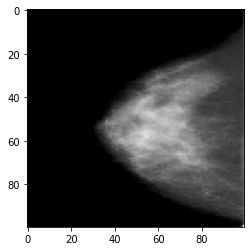

(100, 100)




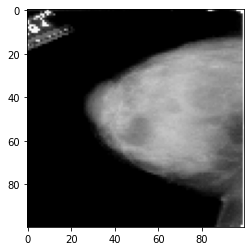

(100, 100)




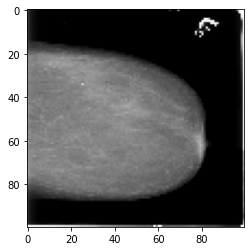

(100, 100)




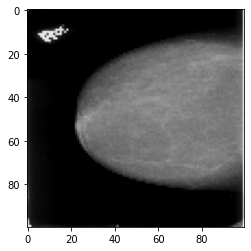

(100, 100)




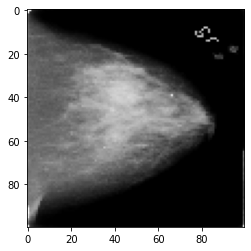

(100, 100)




In [32]:
input_shape = [100, 100]

for img_data in data_1["image file path"].iloc[0:5]:
    img_data = cv2.imread(img_data, cv2.IMREAD_GRAYSCALE)
    img_data = cv2.resize(img_data, input_shape, interpolation=cv2.INTER_LINEAR)
    plt.imshow(img_data, cmap='gray')
    plt.show()
    print(img_data.shape)
    print('\n')

In [33]:
# gfvhftjff

## **Data prep LBP-GLZM** Glzm on original images

## Run Here on...

In [34]:
import pandas as pd

# List of CSV file paths
csv_paths = ['/kaggle/input/average-contrast-values/average_contrast_values.csv']

# Initialize an empty list to store DataFrames
dataframes = []

# Read each CSV file and append its data to the list
for path in csv_paths:
    df = pd.read_csv(path)
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
average_contrast_values = pd.concat(dataframes, ignore_index=True)
average_contrast_values = average_contrast_values['average_contrast'].to_numpy()
len(average_contrast_values)

587

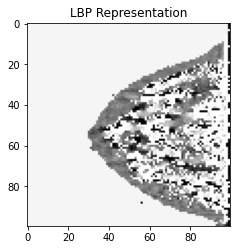

Computation time is: 0.8805421749750774 minutes.
Len of lbp_images 587


In [35]:
from skimage.feature import greycomatrix, local_binary_pattern
from skimage import img_as_ubyte
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
# Assuming X is a list or array containing image arrays

# Create an empty list to store the LBP-enhanced and normalized images
lbp_images = []

# Define LBP parameters
# P = 8
# R = 1
# method = 'uniform'
input_shape = [100,100]
tic=time.time()

# Iterate through each image in X
for img_data in data_1["image file path"].iloc[0:588]:
    img_data = cv2.imread(img_data, cv2.IMREAD_GRAYSCALE)
    img_data = cv2.resize(img_data, input_shape, interpolation=cv2.INTER_LINEAR)

    # Calculate LBP features
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(img_data, n_points, radius, method='uniform')

    lbp_normalized = (lbp - np.min(lbp)) / (np.max(lbp) - np.min(lbp)) * 2 - 1

    # Convert LBP image to 8-bit (0-255)
#     lbp = img_as_ubyte(lbp_normalized)
#     lbp = lbp * 0.829442142883087

    # Append the normalized LBP feature vector to the list
    lbp_images.append(lbp)

# Convert the list of LBP feature vectors to a NumPy array
# lbp_images_array = np.array(lbp_images)

# Display the first original image and its LBP representation
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 2)
# Reshape the LBP feature vector to match the original image shape
plt.imshow(lbp_images[0].reshape(lbp.shape), cmap='gray')
plt.title('LBP Representation')

plt.show()

toc=time.time()
print("Computation time is: {} minutes.".format(str((toc-tic)/60)))

print('Len of lbp_images',len(lbp_images))

In [36]:
from skimage import exposure
lbp_mult_img = []

for i in range(len(lbp_images)):
#     lbp_mult_img.append(lbp_images[i] * average_contrast_values[i])
    gamma_value = 1 / average_contrast_values[i]
    lbp_mult_img.append(exposure.adjust_gamma(lbp_images[i], gamma=gamma_value))

print("Are the pre multiplication and post multiplication images same?\n",np. array_equal(lbp_mult_img[0], lbp_images[0]))

Are the pre multiplication and post multiplication images same?
 False


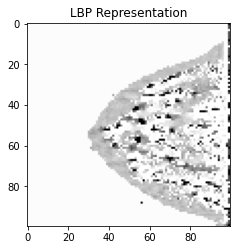

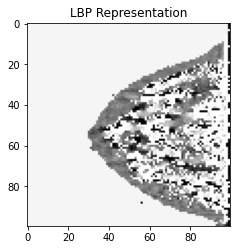

In [37]:
# Display the original image and the LBP representation
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(lbp_mult_img[0], cmap='gray')
plt.title('LBP Representation')

plt.show()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 2)
plt.imshow(lbp_images[0], cmap='gray')
plt.title('LBP Representation')

plt.show()


In [38]:
# Augmentation
import cv2
import numpy as np

# Function to rotate an image by a specified angle
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    return rotated_image

# Initialize an empty list to store augmented images
augmented_images = []

# Loop through each image in lbp_mult_img and generate 36 augmented images
for img in lbp_mult_img:
    original_img = img.copy()
    for i in range(72):
        rotated_img = rotate_image(original_img, 5 * i)
        augmented_images.append(rotated_img)

# Convert the list of augmented images to a NumPy array
augmented_images_array = np.array(augmented_images)
augmented_images_array.shape

(42264, 100, 100)

42264


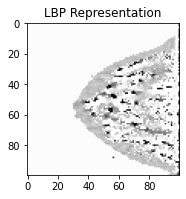

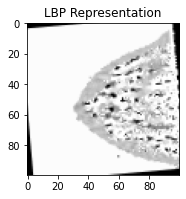

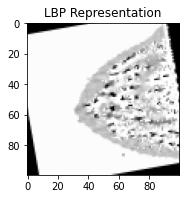

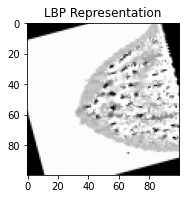

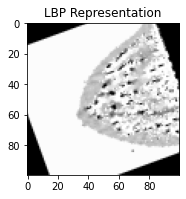

In [39]:
print(len(augmented_images_array))

for i in range(5):
    
    plt.subplot(1, 2, 1)
    plt.imshow(augmented_images_array[i], cmap='gray')
    plt.title('LBP Representation')

    plt.show()
 


In [40]:
augmented_images_array.shape

(42264, 100, 100)

target variable

In [41]:
import numpy as np

# Example data_1["pathology"]
y = data_1["pathology"].iloc[0:len(lbp_images)]  # Replace this with your actual data_1["pathology"]

# Repeat each element in the pathology array 72 times consecutively
y = np.repeat(y, 72)

# Verify the shape and content of the new array
print(y.shape)  # Check the shape
print(y)        # Check the content

from sklearn.preprocessing import LabelEncoder

# Assuming y contains string values representing categories
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Print the unique values of transformed y
unique_values = set(y)
print('Transformed y values:', unique_values)
y

(42264,)
0       MALIGNANT
0       MALIGNANT
0       MALIGNANT
0       MALIGNANT
0       MALIGNANT
          ...    
1544       BENIGN
1544       BENIGN
1544       BENIGN
1544       BENIGN
1544       BENIGN
Name: pathology, Length: 42264, dtype: object
Transformed y values: {0, 1, 2}


array([2, 2, 2, ..., 0, 0, 0])

In [42]:
import numpy as np

# Assuming you have augmented images in "augmented_images_array" and labels in "y"

# Zip the images and labels together
combined_data = list(zip(augmented_images_array, y))

# Shuffle the combined data
np.random.shuffle(combined_data)

# Unzip the shuffled data back into separate arrays for images and labels
augmented_images_array, y = zip(*combined_data)
# augmented_images_array, y = zip(*np.random.shuffle(list(zip(augmented_images_array, y))))


# Convert back to NumPy arrays if needed
augmented_images_array = np.array(augmented_images_array)
y = np.array(y)

print(y[0:588])
# y = shuffled_labels
# augmented_images_array = shuffled_images
len(y)

[0 0 0 0 2 0 2 0 0 0 1 2 1 0 2 2 2 1 0 1 0 1 0 1 2 2 0 1 0 0 2 0 0 0 0 1 2
 0 2 0 0 0 0 1 2 1 2 2 0 0 1 0 0 0 0 1 0 0 0 2 0 0 1 0 0 1 1 2 1 2 0 0 0 0
 0 1 2 1 2 0 0 0 0 0 0 2 0 2 0 2 2 1 2 2 0 1 0 0 2 0 0 1 0 0 0 0 0 2 2 2 0
 2 1 1 2 0 0 2 2 0 1 1 0 2 2 0 2 1 0 0 0 2 2 2 0 0 2 0 2 0 0 0 2 1 2 0 2 0
 1 2 2 1 0 2 0 0 0 0 0 1 1 2 1 0 1 1 2 2 0 0 1 2 2 2 0 2 0 2 2 0 2 1 1 1 0
 0 1 0 2 2 1 0 0 0 2 0 2 2 1 1 0 1 1 2 2 0 0 2 0 2 2 2 2 1 1 2 2 1 0 2 1 2
 0 1 2 1 1 2 1 1 2 0 0 1 0 2 0 1 2 0 1 1 1 0 0 2 2 0 2 0 2 2 2 2 0 0 2 2 2
 0 1 2 2 0 0 1 1 1 0 0 2 2 2 0 0 0 2 2 1 0 0 2 2 2 2 1 0 1 0 0 0 0 1 1 2 1
 0 2 2 2 0 0 2 2 2 1 0 0 1 0 0 0 2 1 2 2 2 1 0 1 2 0 1 2 1 1 0 0 1 0 0 1 0
 2 0 2 1 0 2 0 2 0 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 0 0 0 2 1 0 0 0 0 2 2 0 0
 0 1 0 0 1 0 2 1 1 1 2 1 0 1 2 1 1 2 2 0 2 0 2 0 2 0 2 1 2 1 2 2 2 2 2 2 0
 2 2 2 2 2 1 2 2 0 2 1 0 0 2 0 2 2 2 0 2 1 1 2 2 0 2 0 1 1 2 0 0 1 2 0 0 0
 1 0 0 2 0 2 2 0 0 0 2 1 2 0 2 2 0 2 2 1 2 0 1 2 2 2 1 0 0 0 0 0 2 0 1 2 2
 2 0 0 0 1 0 2 2 2 2 2 2 

42264

In [43]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

# Assuming y contains string values representing categories
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(augmented_images_array, y, test_size = 0.25, random_state = 42)

# rate = 0.5
# num = int(X.shape[0] * rate)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (31698, 100, 100)
X_test shape : (10566, 100, 100)
y_train shape : (31698, 3)
y_test shape : (10566, 3)


In [44]:
import tensorflow as tf 
tf.random.set_seed(100)
input_shape

[100, 100]

In [45]:
# Best performance model
# Reshape X_train and X_test to add the channel dimension
X_train = X_train.reshape(X_train.shape[0], *input_shape, 1)
X_test = X_test.reshape(X_test.shape[0], *input_shape, 1)
# X_val = X_val.reshape(X_val.shape[0], *input_shape, 1)

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU

model = tf.keras.Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(*input_shape, 1)),
    LeakyReLU(alpha=0.01),  # Add Leaky ReLU activation
    MaxPooling2D(strides=2),
    Conv2D(64, (3, 3), padding='same'),
    LeakyReLU(alpha=0.01),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(128, (3, 3), padding='same'),
    LeakyReLU(alpha=0.01),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dropout(0.5),
    Dense(128),
    LeakyReLU(alpha=0.01),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=128)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=75)

model.evaluate(X_test,y_test)

Epoch 1/50
423/423 [==============================] - 17s 22ms/step - loss: 1.0480 - accuracy: 0.4138 - val_loss: 1.0223 - val_accuracy: 0.4429
Epoch 2/50
423/423 [==============================] - 8s 18ms/step - loss: 1.0103 - accuracy: 0.4579 - val_loss: 0.9632 - val_accuracy: 0.5094
Epoch 3/50
423/423 [==============================] - 8s 18ms/step - loss: 0.9596 - accuracy: 0.5108 - val_loss: 0.9254 - val_accuracy: 0.5377
Epoch 4/50
423/423 [==============================] - 8s 18ms/step - loss: 0.8972 - accuracy: 0.5645 - val_loss: 0.8563 - val_accuracy: 0.5901
Epoch 5/50
423/423 [==============================] - 8s 18ms/step - loss: 0.8240 - accuracy: 0.6116 - val_loss: 0.7745 - val_accuracy: 0.6349
Epoch 6/50
423/423 [==============================] - 8s 18ms/step - loss: 0.7156 - accuracy: 0.6738 - val_loss: 0.6782 - val_accuracy: 0.7008
Epoch 7/50
423/423 [==============================] - 8s 18ms/step - loss: 0.5910 - accuracy: 0.7412 - val_loss: 0.5823 - val_accuracy: 0.742

[0.12612766027450562, 0.9629945158958435]

In [46]:
# bs:75

# Epoch 1/50
# 423/423 [==============================] - 9s 20ms/step - loss: 1.0472 - accuracy: 0.4153 - val_loss: 1.0224 - val_accuracy: 0.4398
# Epoch 2/50
# 423/423 [==============================] - 7s 17ms/step - loss: 1.0042 - accuracy: 0.4693 - val_loss: 0.9563 - val_accuracy: 0.5075
# Epoch 3/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.9490 - accuracy: 0.5199 - val_loss: 0.9252 - val_accuracy: 0.5398
# Epoch 4/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.8867 - accuracy: 0.5664 - val_loss: 0.8596 - val_accuracy: 0.5769
# Epoch 5/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.8064 - accuracy: 0.6181 - val_loss: 0.7954 - val_accuracy: 0.6242
# Epoch 6/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.6899 - accuracy: 0.6903 - val_loss: 0.6740 - val_accuracy: 0.7049
# Epoch 7/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.5546 - accuracy: 0.7618 - val_loss: 0.5625 - val_accuracy: 0.7588
# Epoch 8/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.4331 - accuracy: 0.8207 - val_loss: 0.4881 - val_accuracy: 0.7947
# Epoch 9/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.3310 - accuracy: 0.8680 - val_loss: 0.4312 - val_accuracy: 0.8263
# Epoch 10/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.2598 - accuracy: 0.8994 - val_loss: 0.3368 - val_accuracy: 0.8681
# Epoch 11/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.2126 - accuracy: 0.9204 - val_loss: 0.2897 - val_accuracy: 0.8877
# Epoch 12/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.1676 - accuracy: 0.9363 - val_loss: 0.2460 - val_accuracy: 0.9048
# Epoch 13/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.1332 - accuracy: 0.9514 - val_loss: 0.2302 - val_accuracy: 0.9137
# Epoch 14/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.1198 - accuracy: 0.9560 - val_loss: 0.2189 - val_accuracy: 0.9192
# Epoch 15/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.1012 - accuracy: 0.9642 - val_loss: 0.2292 - val_accuracy: 0.9140
# Epoch 16/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0965 - accuracy: 0.9652 - val_loss: 0.1966 - val_accuracy: 0.9301
# Epoch 17/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0829 - accuracy: 0.9710 - val_loss: 0.1941 - val_accuracy: 0.9310
# Epoch 18/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0738 - accuracy: 0.9749 - val_loss: 0.2044 - val_accuracy: 0.9250
# Epoch 19/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.1033 - accuracy: 0.9654 - val_loss: 0.1655 - val_accuracy: 0.9443
# Epoch 20/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0658 - accuracy: 0.9773 - val_loss: 0.1618 - val_accuracy: 0.9433
# Epoch 21/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0620 - accuracy: 0.9767 - val_loss: 0.1793 - val_accuracy: 0.9399
# Epoch 22/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0544 - accuracy: 0.9802 - val_loss: 0.1529 - val_accuracy: 0.9499
# Epoch 23/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0584 - accuracy: 0.9791 - val_loss: 0.1388 - val_accuracy: 0.9531
# Epoch 24/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0602 - accuracy: 0.9783 - val_loss: 0.1658 - val_accuracy: 0.9445
# Epoch 25/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0575 - accuracy: 0.9797 - val_loss: 0.1446 - val_accuracy: 0.9536
# Epoch 26/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0503 - accuracy: 0.9821 - val_loss: 0.1392 - val_accuracy: 0.9530
# Epoch 27/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0510 - accuracy: 0.9829 - val_loss: 0.1358 - val_accuracy: 0.9540
# Epoch 28/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0444 - accuracy: 0.9844 - val_loss: 0.1622 - val_accuracy: 0.9464
# Epoch 29/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0461 - accuracy: 0.9829 - val_loss: 0.1600 - val_accuracy: 0.9469
# Epoch 30/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0458 - accuracy: 0.9841 - val_loss: 0.1471 - val_accuracy: 0.9541
# Epoch 31/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0474 - accuracy: 0.9829 - val_loss: 0.1300 - val_accuracy: 0.9592
# Epoch 32/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0431 - accuracy: 0.9859 - val_loss: 0.1547 - val_accuracy: 0.9514
# Epoch 33/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0435 - accuracy: 0.9851 - val_loss: 0.1194 - val_accuracy: 0.9599
# Epoch 34/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0423 - accuracy: 0.9858 - val_loss: 0.1494 - val_accuracy: 0.9535
# Epoch 35/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0441 - accuracy: 0.9850 - val_loss: 0.1122 - val_accuracy: 0.9635
# Epoch 36/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0416 - accuracy: 0.9855 - val_loss: 0.1198 - val_accuracy: 0.9611
# Epoch 37/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0382 - accuracy: 0.9868 - val_loss: 0.1346 - val_accuracy: 0.9563
# Epoch 38/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0406 - accuracy: 0.9867 - val_loss: 0.1129 - val_accuracy: 0.9607
# Epoch 39/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0345 - accuracy: 0.9877 - val_loss: 0.1155 - val_accuracy: 0.9620
# Epoch 40/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.1182 - val_accuracy: 0.9622
# Epoch 41/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0326 - accuracy: 0.9891 - val_loss: 0.1080 - val_accuracy: 0.9662
# Epoch 42/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.1265 - val_accuracy: 0.9589
# Epoch 43/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0365 - accuracy: 0.9880 - val_loss: 0.1385 - val_accuracy: 0.9557
# Epoch 44/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0328 - accuracy: 0.9886 - val_loss: 0.1296 - val_accuracy: 0.9594
# Epoch 45/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0408 - accuracy: 0.9865 - val_loss: 0.1181 - val_accuracy: 0.9638
# Epoch 46/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0364 - accuracy: 0.9878 - val_loss: 0.1236 - val_accuracy: 0.9605
# Epoch 47/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0287 - accuracy: 0.9901 - val_loss: 0.1130 - val_accuracy: 0.9638
# Epoch 48/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0336 - accuracy: 0.9881 - val_loss: 0.1183 - val_accuracy: 0.9619
# Epoch 49/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0291 - accuracy: 0.9896 - val_loss: 0.1348 - val_accuracy: 0.9592
# Epoch 50/50
# 423/423 [==============================] - 7s 17ms/step - loss: 0.0290 - accuracy: 0.9913 - val_loss: 0.1016 - val_accuracy: 0.9680
# 331/331 [==============================] - 1s 4ms/step - loss: 0.1016 - accuracy: 0.9680

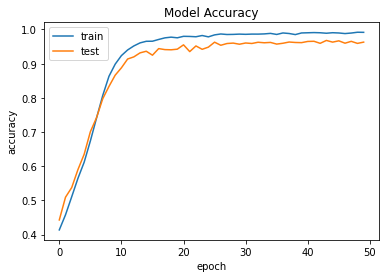

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

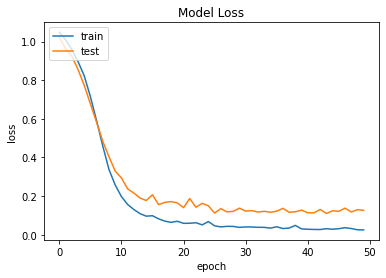

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

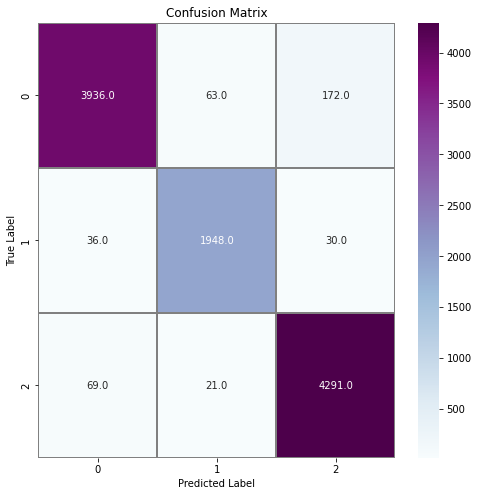

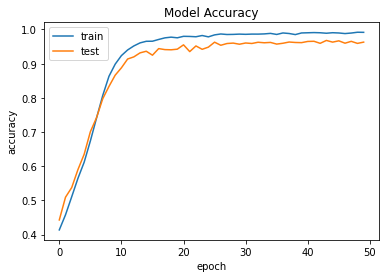

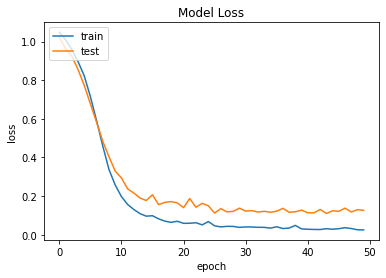

In [49]:

from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
from sklearn.metrics import classification_report

# Assuming you have predictions for X_test, replace predictions with the actual variable containing predictions
y_pred = model.predict(X_test)

# Convert one-hot encoded labels to integer labels
y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test_int, y_pred_int)

# Print the classification report
print(report)

# Extract precision and recall for a specific class (replace class_index with the desired class index)
class_index = 1
class_precision = float(report.split('\n')[class_index + 2].split()[1])
class_recall = float(report.split('\n')[class_index + 2].split()[2])

print(f'Precision for class {class_index}: {class_precision}')
print(f'Recall for class {class_index}: {class_recall}')

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      4171
           1       0.96      0.97      0.96      2014
           2       0.96      0.98      0.97      4381

    accuracy                           0.96     10566
   macro avg       0.96      0.96      0.96     10566
weighted avg       0.96      0.96      0.96     10566

Precision for class 1: 0.96
Recall for class 1: 0.97


In [56]:
from sklearn.metrics import classification_report

# Assuming you have predictions for X_train, replace predictions with the actual variable containing predictions
y_train_pred = model.predict(X_train)

# Convert one-hot encoded labels to integer labels for training set
y_train_int = np.argmax(y_train, axis=1)
y_train_pred_int = np.argmax(y_train_pred, axis=1)

# Generate classification report for training set
train_report = classification_report(y_train_int, y_train_pred_int)

# Print the classification report for training set
print("Classification Report for Training Set:")
print(train_report)

# Extract precision and recall for a specific class in the training set
class_index = 1  # replace with the desired class index
class_precision_train = float(train_report.split('\n')[class_index + 2].split()[1])
class_recall_train = float(train_report.split('\n')[class_index + 2].split()[2])

print(f'Precision for class {class_index} in training set: {class_precision_train}')
print(f'Recall for class {class_index} in training set: {class_recall_train}')

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12317
           1       1.00      1.00      1.00      6266
           2       1.00      1.00      1.00     13115

    accuracy                           1.00     31698
   macro avg       1.00      1.00      1.00     31698
weighted avg       1.00      1.00      1.00     31698

Precision for class 1 in training set: 1.0
Recall for class 1 in training set: 1.0


The classification report provides a comprehensive view of the performance of your classification model. Here's how to interpret the key metrics:

- **Precision**: Precision is the number of true positives divided by the total number of predicted positives. It measures the accuracy of the positive predictions. For each class (0, 1, 2), you have precision values: 0.97, 0.92, and 0.95, respectively. These values indicate how often the model was correct when predicting a positive instance.

- **Recall (Sensitivity)**: Recall is the number of true positives divided by the total number of actual positives. It measures the ability of the classifier to capture all the positive instances. For each class, you have recall values: 0.92, 0.98, and 0.97. These values indicate the proportion of actual positive instances that the model correctly predicted.

- **F1-Score**: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For each class, you have F1-score values: 0.94, 0.95, and 0.96.

- **Support**: Support is the number of actual occurrences of the class in the specified dataset. For each class, you have support values: 4171, 2014, and 4381.

- **Accuracy**: Overall accuracy of the model across all classes. It is calculated as the sum of correct predictions divided by the total number of predictions. In this case, the accuracy is 0.95, or 95%.

- **Macro Avg**: The macro-average is the average of precision, recall, and F1-score across all classes. It gives equal weight to each class, regardless of class imbalance. In this case, the macro-average F1-score is 0.95.

- **Weighted Avg**: The weighted average considers the number of samples in each class. It is the weighted average of precision, recall, and F1-score, with weights proportional to the number of true instances for each class. In this case, the weighted average F1-score is 0.95.

In summary, your model is performing well across all three classes, with high precision, recall, and F1-score values. The accuracy of 95% suggests that the model is making correct predictions for a large portion of the dataset.

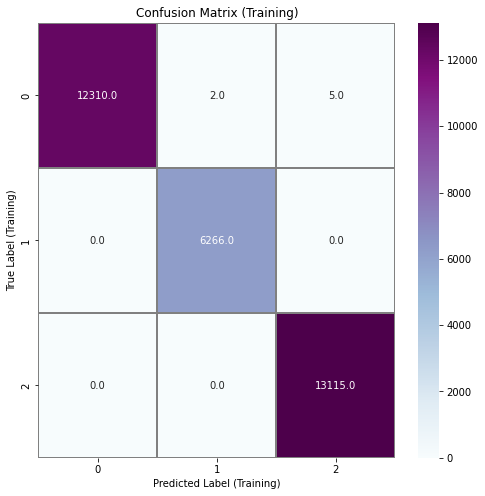

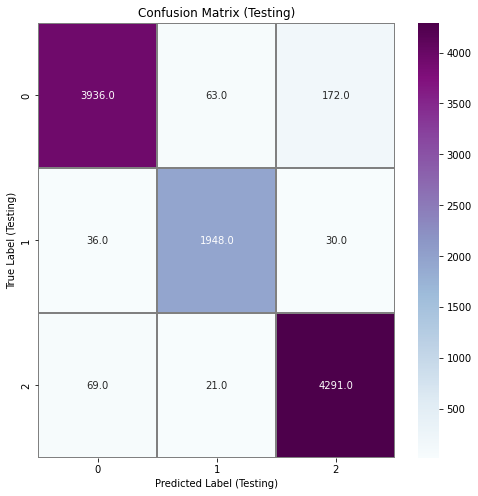

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Training set
Y_train_pred = model.predict(X_train)
Y_train_pred_classes = np.argmax(Y_train_pred, axis=1)
Y_train_true = np.argmax(y_train, axis=1)

confusion_mtx_train = confusion_matrix(Y_train_true, Y_train_pred_classes)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx_train, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label (Training)")
plt.ylabel("True Label (Training)")
plt.title("Confusion Matrix (Training)")
plt.show()

# Testing set
Y_test_pred = model.predict(X_test)
Y_test_pred_classes = np.argmax(Y_test_pred, axis=1)
Y_test_true = np.argmax(y_test, axis=1)

confusion_mtx_test = confusion_matrix(Y_test_true, Y_test_pred_classes)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx_test, annot=True, linewidths=0.01, cmap="BuPu", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label (Testing)")
plt.ylabel("True Label (Testing)")
plt.title("Confusion Matrix (Testing)")
plt.show()


In [58]:
from sklearn.metrics import classification_report
from math import sqrt

# Training set
print("Classification Report (Training):")
report_train = classification_report(Y_train_true, Y_train_pred_classes, output_dict=True)
for label, scores in report_train.items():
    if label.isdigit():  # Check if the label is a class (numeric)
        precision = scores['precision']
        recall = scores['recall']
        gscore = sqrt(precision * recall) if (precision * recall) > 0 else 0
        f1 = scores['f1-score']
        print(f"Class {label} - G-score: {gscore:.4f}")
        print(f"Class {label} - Precision: {precision:.4f}")
        print(f"Class {label} - Recall: {recall:.4f}")
        print(f"Class {label} - F1-score: {f1:.4f}")

# Testing set
print("Classification Report (Testing):")
report_test = classification_report(Y_test_true, Y_test_pred_classes, output_dict=True)
for label, scores in report_test.items():
    if label.isdigit():  # Check if the label is a class (numeric)
        precision = scores['precision']
        recall = scores['recall']
        gscore = sqrt(precision * recall) if (precision * recall) > 0 else 0
        f1 = scores['f1-score']
        print(f"Class {label} - G-score: {gscore:.4f}")
        print(f"Class {label} - Precision: {precision:.4f}")
        print(f"Class {label} - Recall: {recall:.4f}")
        print(f"Class {label} - F1-score: {f1:.4f}")


Classification Report (Training):
Class 0 - G-score: 0.9997
Class 0 - Precision: 1.0000
Class 0 - Recall: 0.9994
Class 0 - F1-score: 0.9997
Class 1 - G-score: 0.9998
Class 1 - Precision: 0.9997
Class 1 - Recall: 1.0000
Class 1 - F1-score: 0.9998
Class 2 - G-score: 0.9998
Class 2 - Precision: 0.9996
Class 2 - Recall: 1.0000
Class 2 - F1-score: 0.9998
Classification Report (Testing):
Class 0 - G-score: 0.9587
Class 0 - Precision: 0.9740
Class 0 - Recall: 0.9437
Class 0 - F1-score: 0.9586
Class 1 - G-score: 0.9629
Class 1 - Precision: 0.9587
Class 1 - Recall: 0.9672
Class 1 - F1-score: 0.9629
Class 2 - G-score: 0.9672
Class 2 - Precision: 0.9550
Class 2 - Recall: 0.9795
Class 2 - F1-score: 0.9671
